### - Install 

In [1]:
# !pip install node2vec

### - Import

In [2]:
import networkx as nx
from node2vec import Node2Vec

import numpy as np
import matplotlib.pyplot as plt

### - Example graph 

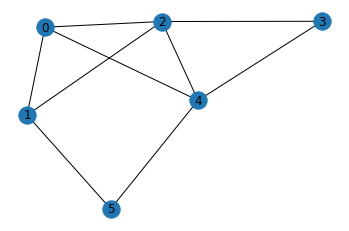

[[0. 1. 1. 0. 1. 0.]
 [1. 0. 1. 0. 0. 1.]
 [1. 1. 0. 1. 1. 0.]
 [0. 0. 1. 0. 1. 0.]
 [1. 0. 1. 1. 0. 1.]
 [0. 1. 0. 0. 1. 0.]]


In [3]:
adj = np.array(
    [[0., 1., 1., 0., 1., 0.], 
     [1., 0., 1., 0., 0., 1.],
     [1., 1., 0., 1., 1., 0.],
     [0., 0., 1., 0., 1., 0.],
     [1., 0., 1., 1., 0., 1.],
    [0., 1., 0., 0., 1., 0.]])
G = nx.Graph(adj)
nx.draw_networkx(G)
plt.axis('off')
plt.show()

A = nx.to_numpy_matrix(G)
print(A)

### - Node2Vec
- References: https://github.com/eliorc/node2vec

In [4]:
node2vec = Node2Vec(graph=G, # The first positional argument has to be a networkx graph. Node names must be all integers or all strings. On the output model they will always be strings.
                    dimensions=50, # Embedding dimensions (default: 128)
                    walk_length=3, # number of nodes in each walks 
                    num_walks=5, # Number of walks per node (default: 10)
                    p = 1, # 전 꼭짓점으로 돌아올 가능성, 얼마나 주변을 잘 탐색하는가
                    q = 0.0001, # 전 꼭짓점으로부터 멀어질 가능성, 얼마나 새로운 곳을 잘 탐색하는가
                    weight_key=None, # On weighted graphs, this is the key for the weight attribute (default: 'weight')
                    workers=1 # Number of workers for parallel execution (default: 1)
                   )

Generating walks (CPU: 1): 100%|██████████| 5/5 [00:00<00:00, 1375.45it/s]


### -  Number of the random walk: num_walks * number of the node

In [5]:
len(node2vec.walks)

30

### - Print random walk list

In [6]:
for i, random_walk in enumerate(node2vec.walks):
    print(random_walk)

['4', '3', '2']
['5', '1', '2']
['1', '5', '4']
['3', '2', '0']
['0', '4', '5']
['2', '1', '5']
['1', '2', '3']
['4', '3', '2']
['3', '4', '0']
['0', '2', '3']
['2', '4', '5']
['5', '1', '0']
['1', '0', '4']
['3', '2', '0']
['5', '1', '0']
['4', '3', '4']
['2', '0', '1']
['0', '4', '5']
['2', '4', '5']
['4', '2', '1']
['1', '2', '3']
['3', '2', '0']
['5', '1', '2']
['0', '2', '3']
['0', '4', '5']
['2', '0', '4']
['3', '4', '5']
['1', '2', '3']
['4', '3', '4']
['5', '4', '0']


In [7]:
walk_dic = {}
for i, random_walk in enumerate(node2vec.walks):
    if not int(random_walk[0]) in walk_dic:
        walk_dic[int(random_walk[0])] = []
    walk_dic[int(random_walk[0])].append(random_walk)
print(walk_dic)

{4: [['4', '3', '2'], ['4', '3', '2'], ['4', '3', '4'], ['4', '2', '1'], ['4', '3', '4']], 5: [['5', '1', '2'], ['5', '1', '0'], ['5', '1', '0'], ['5', '1', '2'], ['5', '4', '0']], 1: [['1', '5', '4'], ['1', '2', '3'], ['1', '0', '4'], ['1', '2', '3'], ['1', '2', '3']], 3: [['3', '2', '0'], ['3', '4', '0'], ['3', '2', '0'], ['3', '2', '0'], ['3', '4', '5']], 0: [['0', '4', '5'], ['0', '2', '3'], ['0', '4', '5'], ['0', '2', '3'], ['0', '4', '5']], 2: [['2', '1', '5'], ['2', '4', '5'], ['2', '0', '1'], ['2', '4', '5'], ['2', '0', '4']]}


### - Analysis of random walk

In [8]:
number_list = [0 for i in range(6)]
for i, random_walk in enumerate(node2vec.walks):
    for node in random_walk:
        number_list[int(node)] += 1
print(number_list)

[15, 12, 18, 14, 18, 13]


In [9]:
number_list = [0 for i in range(6)]
for i, random_walk in enumerate(node2vec.walks):
    number_list[int(random_walk[0])] += 1
print(number_list)

[5, 5, 5, 5, 5, 5]
